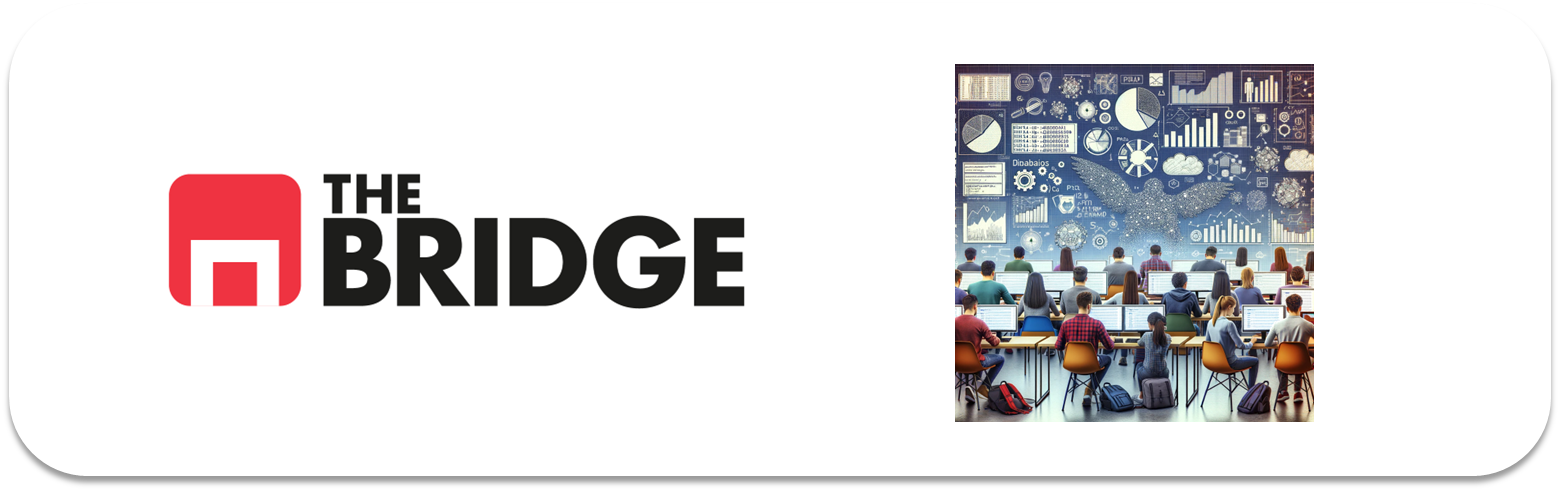

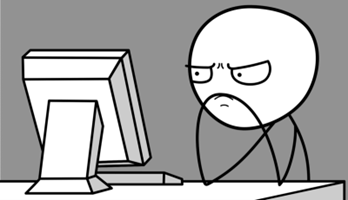

Para ejercitarte y afianzar lo aprendido sobre **Inferencial**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [19]:
!pip install statsmodels

In [20]:
import numpy as np
import pandas as pd
import scipy.stats as stats

from math import sqrt
from statsmodels.stats.proportion import proportions_ztest

In [21]:
### Ejercicio 1

Carga el dataset de satisfacción vital (en la ruta "./data/lifesat_full.csv") y, considerando un contexto mundial, contesta a las siguientes preguntas:

*Cargamos el dataset y vemos sus variables*

In [22]:
df_ls = pd.read_csv("./data/lifesat_full.csv")

In [23]:
df_ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               36 non-null     object 
 1   GDP per capita (USD)  36 non-null     float64
 2   Life satisfaction     36 non-null     float64
 3   Life expectancy       36 non-null     float64
 4   Homicide rate         36 non-null     float64
 5   Employment rate       36 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.8+ KB


1. ¿Cuál es la muestras y cuál la población?

***Muestra:** es el dataset mismo, ya que sólo tiene datos de 36 países y nos dicen que consideremos un contexto mundial, claramente no tenemos todos los países del mundo*   
   
***Poblacion:** de igual manera como nos dicen un contexto mundial, la población será... NO, no son los habitantes del mundo (Población lleva a engaño pero en nuestro bootcamp se refiere al concepto estadístico no necesariamente a personas)... en este caso en el que el dataset tiene países por filas, es decir la entidad que tratamos son países por lo tanto la Población son todos los países del mundo.*

2. Suponiendo que se cumplen las condiciones para poder aplicar la fórmula del intervalo de confianza con garantías, ¿entre que valores se encontrará la media de satisfacción vital del mundo considerando la muestra del dataset como una muestra representativia?

*Nos están pidiendo que apliquemos el IC (intervalo de confianza) tal y como lo calculamos en la pildora del workout:*

$$IC = \pm\,1.96 \times SE$$

*Recordamos que SE, erra el error estándar y cómo se calculaba:*
$$ SE = \frac{s}{\sqrt{n}}$$
$$s = \sqrt{\frac{\sum\limits_{i=1}^n(x_i - \bar x)^2}{n-1}} $$

*Y copiando y modificando el código Python que ya utilizamos en la píldora del Intervalo de confianza*

In [24]:
s = df_ls["Life satisfaction"].std() # Obtenemos la desviación estándar de la variable considerada ("Life satisfaction")
SE = s/sqrt(len(df_ls)) # Aplicamos la fórmula del errór típico o error estándar
media_ls = round(df_ls["Life satisfaction"].mean(),2) # Obtenemos la media muestral
IC = round(1.96 * SE,2) # Aplicamos la fórmula del intervalo de confianza (PARA UNA CONFIANZA ESTADISTICA DEL 95%)
print("IC = ", IC) # Imprimmos el intervalo
print(f"Intervalo de la media poblacional: [{media_ls -IC},{media_ls +IC}]")

IC =  0.25
Intervalo de la media poblacional: [6.32,6.82]


$$\mu \in [6.32,6.82]$$

*Podemos suponer con una confianza estadística del 95% que la media de la satisfacción mundial (tal y como se mida en el dataset que tenemos) esta entre 6.32 y 6.82*

3. Haz lo mismo para la esperanza de vida

*El razonamiento y exposición es análogo al mostrado en 2, así que aplicamos el código adaptado a la variable correspondiente en este caso "Life expectancy" (según las columnas del dataset)*

In [25]:
s = df_ls["Life expectancy"].std() # Obtenemos la desviación estándar de la variable considerada ("Life satisfaction")
SE = s/sqrt(len(df_ls)) # Aplicamos la fórmula del errór típico o error estándar
media_ls = round(df_ls["Life expectancy"].mean(),2) # Obtenemos la media muestral
IC = round(1.96 * SE,2) # Aplicamos la fórmula del intervalo de confianza (PARA UNA CONFIANZA ESTADISTICA DEL 95%)
print("IC = ", IC) # Imprimmos el intervalo
print(f"Intervalo de la media poblacional: [{media_ls -IC},{media_ls +IC}]")

IC =  1.58
Intervalo de la media poblacional: [77.88,81.03999999999999]


*Podemos esperar que la esperanza de vida media poblacional esté entre 77.88 y 81.04 años, siempre y cuando nuestra muestra sea representativa*

### Ejercicio 2

 Queremos saber si la media del peso de una especie de tortuga que habita en Costa Rica es igual a 310 gramos.Para contrastarlo, recolectamos una serie de muestras de tortugas con los siguientes pesos: 

`Pesos = [300, 315, 320, 311, 314, 309, 300, 308, 305, 303, 305, 301, 303]`

Empleando el test correspondiente, ¿podemos decir con confianza estadística al 95% que el peso medio no es de 310 gramos?

**Primer paso**: establecemos la hipótesis nula (H0) y la hipótesis alternativa 

$H_0: \mu = 310$

$H_a: \mu \neq 310$

Es IMPORTANTE recordar que en general la hipótesis NULA viene dada para cada test, y nosotros lo que podemos y hacemos es escoger la hipótesis alternativa (que coincide con lo que queremos reafirmar a un porcentaje de confianza estadística, que es 1-p_value)

El tipo de hipótesis alternativa Ha define si una prueba es de una cola (unilateral) o de dos colas (bilateral).  

**Pruebas bilaterales o de dos colas**: La hipótesis alternativa contiene el signo "$\neq$"

**Pruebas unilaterales o de una cola**: La hipótesis alternativa contiene "$>$" o "$<$"

En este ejemplo, tendríamos una prueba bilateral. Esto afecta a si tenemos que incluir el parámetro "alternative" en el estadístico (si no ponemos nada es un bilateral por defecto, y se usa para comprobar igualdades y desigualdades)





In [26]:
Pesos = [300, 315, 320, 311, 314, 309, 300, 308, 305, 303, 305, 301, 303]

stats.ttest_1samp(a=Pesos,popmean=310) # Como es bilateral no incluimos el parametro <alterantive>

TtestResult(statistic=-1.5848116313861254, pvalue=0.13899442751587526, df=12)

*Como el **p-valor** del test **no es inferior a 0.05**, no podemos rechazar la hipótesis nula, es decir, no tenemos evidencias suficientes para decir que la media de peso de esta especie de tortuga es diferente de 310 gramos.*


### Ejercicio 3

Se estima que la altura media de los hombres de la tribu Daasanach en Etiopía es **superior a 202 centímetros**. Para comprobarlo, viajas a Adís Abeba y colectas, con rigor científico, las siguientes mediciones: 

alturas_medidas = [2.01, 2.0, 2.01, 1.98, 2.06, 2.05, 1.99, 2.01, 2.02, 2.04, 2.03, 2.05, 2.06, 2.04, 2.02, 2.04, 2.06, 2.06, 2.05]

Implementa un test de hipótesis para determinar si la media de la altura es realmente superior a 202 centímetros **con confianza estadística al 95%**

*Planteamos nuestras hipótesis teneniendo en cuenta que nuestra alternativa es lo que queremos probar con confianza estadística, es decir que la media poblacional puede ser superior a 202 centímetros*

**$H_0$** (hipótesis nula): $\mu\leq202$ cm  
**$H_a$** (hipótesis alternativa): $\mu>202$ cm

*Y ahora aplicamos el t-test para contrastes de mayor menor que es un contraste unilateral y por tanto tenemos que decírselo en el argumento a la funció de scipy, fijate que valor ponemos en el parámetro `alternative`*

In [27]:

alturas_medidas = [2.01, 2.0, 2.01, 1.98, 2.06, 2.05, 1.99, 2.01, 2.02, 2.04, 2.03, 2.05, 2.06, 2.04, 2.02, 2.04, 2.06, 2.06, 2.05]
stats.ttest_1samp(a=alturas_medidas,popmean=2.02,alternative='greater')

TtestResult(statistic=1.8156825980064113, pvalue=0.04305760924787729, df=18)

*Como el p-value es menor que 0.05 (1-0.95, porque 95% es la confianza que nos han pedido), podemos rechazar la hipótesis nula y ACEPTAR la HIPOTESIS ALTERNATIVA con confianza estadística al 95%*

### Ejercicio 4

Tenemos los resultado electorales en escaños de dos partidos políticos durante una muestra de las últimas 40 elecciones.

partido_primero = [115, 138, 109, 141, 139, 131, 123, 128, 144, 167, 134, 142, 174, 149, 115, 152, 131, 161, 131, 121]

partido_segundo = [138, 126, 87, 122, 102, 111, 130, 137, 103, 115, 132, 110, 120, 145, 146, 122, 138, 132, 135, 127]


 ¿Con qué confianza estadística podríamos decir que el primer partido tiene una media de escaños superior al primero?

*Lo primero es comprobar que la media muestra del partido_primero es superior a la media muestral del partido segundo*

In [28]:
partido_primero = [115, 138, 109, 141, 139, 131, 123, 128, 144, 167, 134, 142, 174, 149, 115, 152, 131, 161, 131, 121]
partido_segundo = [138, 126, 87, 122, 102, 111, 130, 137, 103, 115, 132, 110, 120, 145, 146, 122, 138, 132, 135, 127]

In [29]:
print("Media partido primero: ", np.mean(partido_primero))
print("Media partido segundo: ", np.mean(partido_segundo))

Media partido primero:  137.25
Media partido segundo:  123.9


*Y ahora aplicamos el estadístico tal y como lo vimos en la píldora final de medias muestrales de variables continuas. Primero las hipótesis:*


**$H_0$** (hipótesis nula): $\mu_{\text{partido\_primero}} = \mu_{\text {partido\_segundo}}$   

**$H_a$** (hipótesis alternativa): $\mu_{\text {partido\_primero}} > \mu_{\text {partido\_segundo}}$

*El mayor en la hipótesis alternativa nos indica un test unilateral, lo que básicamente se traduce en que hay que introducir el parámetro 'alternative' en el test y en este caso como es > el signo con valor "greater"*

In [30]:
stats.ttest_ind(a=partido_primero, b=partido_segundo, alternative='greater')

TtestResult(statistic=2.569515505342647, pvalue=0.0071158710629197095, df=38.0)

*La confianza estadística, cuando no la "fijamos" viene dada por 1 menos el p_value obtenido en este caso:*

In [31]:
p_value = stats.ttest_ind(a=partido_primero, b=partido_segundo, alternative='greater').pvalue # Recuperamos el p_value

In [32]:
print("Confianza estadística:", 1- p_value)

Confianza estadística: 0.9928841289370803


*Más del 99% de confianza en que el partido primero tiene una media superior en las elecciones (las 40) que el partido segundo*

### Ejercicio 5

Carga el dataset del Titanic ("data/titanic.csv") y, considerándolo como lo que es una muestra del pasaje del Titanic, obten el rango del valor del ratio de supervivencia que podríamos esperar para todo el pasaje (no sólo para nuestra muestra) con una confianza estadística del 95%.

In [33]:
df_t = pd.read_csv("./data/titanic.csv"
                   )

Calculamos el ratio de supervivencia muestral:

In [34]:
supervivientes = len(df_t.loc[df_t.alive == "yes"])
ratio = round(supervivientes/len(df_t),2)
print("Ratio de supervivencia:", ratio)


Ratio de supervivencia: 0.38


*Si el ratio de supervivencia fuera una variable continua de la muestra podríamos calcular el rango aplicando el IC y obnteniendo este con la fórmula.*

*Pero el IC no podemos obtenerlo por la fórmula porque no tenemos un ratio de supervivencia para cada persona, no podemos obtener ni el error muestral ni la desviación estándar... Tendremos que obtenerlo por aproximación como hicimos con la variables numéricas en una de las pildoras. Es decir ir aumentando el IC desde 0 hasta conseguir una confianza estadística del 95% en el test-Z. Empleando las sisguientes hipótesis*

$$H_0: \pi = ratio\_{supervivencia\_muestra} + IC\,\% \;$$  

$$H_a: \pi \neq ratio\_{supervivencia\_muestra} + IC\,\%$$

*Y el valor de IC lo iremos aumentando para obtener el rango superior del intervalo y disminuyéndolo para el rango inferior*

In [35]:
p_value_target = 0.05

previous_IC = 0
for IC in np.arange(0,0.5,0.01): # partimos de IC de 0 hasta 0.5 (que dada la media muestral sería como suponer un ratio de supervivencia del 0.38 + 0.5 = 0.88), 
                                      # hasta encontrar el IC máximo que nos garantice al 95% (el p_value_target) que el ratio poblacional puede tener ese valor
    p_hat = ratio  # la proporción muestral (Calculada antes)
    Pi = ratio + IC # el valor de comprobación en Z-Test
    pasajeros = len(df_t)
    z_stat, p_value = proportions_ztest(p_hat * pasajeros, pasajeros, Pi)
    print(f"Para un IC: {IC}, comprobamos pi = {Pi} y nos da un p-value = {p_value}")
    if p_value <= p_value_target:
        print(f"para IC =  {IC} se rechaza la hipótesis nula de igualdad, es decir pi = {Pi}",\
               f"ya no es una posible media poblacional al {(1-p_value_target)*100}% de signifcacion")
        print(f"Nuestro limite superior al ratios escogido es entonces, IC = {previous_IC + p_hat} ")
        break
    previous_IC = IC

Para un IC: 0.0, comprobamos pi = 0.38 y nos da un p-value = 1.0
Para un IC: 0.01, comprobamos pi = 0.39 y nos da un p-value = 0.53857707748251
Para un IC: 0.02, comprobamos pi = 0.4 y nos da un p-value = 0.21872246002817097
Para un IC: 0.03, comprobamos pi = 0.41000000000000003 y nos da un p-value = 0.06505231362700103
Para un IC: 0.04, comprobamos pi = 0.42 y nos da un p-value = 0.013898944635809509
para IC =  0.04 se rechaza la hipótesis nula de igualda, es decir pi = 0.42 ya no es una posible media poblacional al 95.0% de signifcacion
Nuestro limite superior al ratios escogido es entonces, IC = 0.41000000000000003 


*Nuestro valor superior es 41% de ratio de supervivencia*

*Y hacemos lo mismo pero para el límite inferior*

In [36]:
p_value_target = 0.05

previous_IC = 0
for IC in np.arange(0,-0.3,-0.01): # partimos de IC de 0 hasta -0.3 (que dada la media muestral sería como suponer un ratio de supervivencia del 0.38 - 0.3 = 0.08), 
                                      # hasta encontrar el IC máximo que nos garantice al 95% (el p_value_target) que el ratio poblacional puede tener ese valor
    p_hat = ratio  # la proporción muestral (Calculada antes)
    Pi = ratio + IC # el valor de comprobación en Z-Test
    pasajeros = len(df_t)
    z_stat, p_value = proportions_ztest(p_hat * pasajeros, pasajeros, Pi)
    print(f"Para un IC: {IC}, comprobamos pi = {Pi} y nos da un p-value = {p_value}")
    if p_value <= p_value_target:
        print(f"para IC =  {IC} se rechaza la hipótesis nula de igualdad, es decir pi = {Pi}",\
               f"ya no es una posible media poblacional al {(1-p_value_target)*100}% de signifcacion")
        print(f"Nuestro limite superior al ratios escogido es entonces, IC = {previous_IC + p_hat} ")
        break
    previous_IC = IC

Para un IC: 0.0, comprobamos pi = 0.38 y nos da un p-value = 1.0
Para un IC: -0.01, comprobamos pi = 0.37 y nos da un p-value = 0.53857707748251
Para un IC: -0.02, comprobamos pi = 0.36 y nos da un p-value = 0.21872246002817097
Para un IC: -0.03, comprobamos pi = 0.35 y nos da un p-value = 0.06505231362700103
Para un IC: -0.04, comprobamos pi = 0.34 y nos da un p-value = 0.013898944635809509
para IC =  -0.04 se rechaza la hipótesis nula de igualda, es decir pi = 0.34 ya no es una posible media poblacional al 95.0% de signifcacion
Nuestro limite superior al ratios escogido es entonces, IC = 0.35 


*Dado que es un test simétrico podríamos habernos saltado esta parte y haber asignado directamente e.-0.03 pero es bueno confirmarlo numéricamente. Por tanto nuestro rango es 35% y 41%:*

$$\pi_{ratio\_superviviencia} \in [0.35,0.41]$$